In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reports_list = os.listdir()

def printList(x):
    print()
    for entry in x:
        print(entry)
        
reports_list = list(filter(lambda x: 'speed' in x or 'quality' in x, sorted(reports_list)))
print('***************************************')
print(f'Found {len(reports_list)} files in reports.')
print('***************************************')

speed_reports = list(filter(lambda x: 'speed' in x and not 'msdnet' in x, reports_list))
quality_reports = list(filter(lambda x: 'quality' in x and not 'msdnet' in x, reports_list))
print()
print(f'{len(speed_reports)} Speed reports vailable: ')
printList(speed_reports)
print()
print(f'{len(quality_reports)} Quality reports available:')
printList(quality_reports)

***************************************
Found 66 files in reports.
***************************************

30 Speed reports vailable: 

speed-densenet121-none-run.csv
speed-densenet121-skip-last-n-block-run.csv
speed-densenet121-skip-last-run.csv
speed-densenet121-skip-norm-n-run.csv
speed-densenet121-skip-run.csv
speed-densenet169-none-run.csv
speed-densenet169-skip-last-n-block-run.csv
speed-densenet169-skip-last-run.csv
speed-densenet169-skip-norm-n-run.csv
speed-densenet169-skip-run.csv
speed-resnet101-drop-last-rand-n-run.csv
speed-resnet101-drop-norm-n-run.csv
speed-resnet101-drop-rand-n-run.csv
speed-resnet101-none-run.csv
speed-resnet152-drop-last-rand-n-run.csv
speed-resnet152-drop-norm-n-run.csv
speed-resnet152-drop-rand-n-run.csv
speed-resnet152-none-run.csv
speed-resnet18-drop-last-rand-n-run.csv
speed-resnet18-drop-norm-n-run.csv
speed-resnet18-drop-rand-n-run.csv
speed-resnet18-none-run.csv
speed-resnet34-drop-last-rand-n-run.csv
speed-resnet34-drop-norm-n-run.csv
speed-

      run  skip_n bench_type         arch   pol      prec       rec       acc  \
0       0       0    quality  densenet121  none  0.682875  0.682879  0.703656   
841     0       0    quality  densenet169  none  0.600423  0.600720  0.612246   
2312    0       0    quality    resnet101  none  0.065539  0.067045  0.110526   
2943    0       0    quality    resnet152  none  0.585624  0.585492  0.604947   
3394    0       0    quality     resnet18  none  0.684989  0.684924  0.685383   
3935    0       0    quality     resnet34  none  0.701903  0.703409  0.705718   
4476    0       0    quality     resnet50  none  0.621564  0.621515  0.609135   

            f1  time  
0     0.682744   0.0  
841   0.592302   0.0  
2312  0.058128   0.0  
2943  0.574805   0.0  
3394  0.671122   0.0  
3935  0.688687   0.0  
4476  0.600557   0.0  
             arch   pol      prec       rec       acc        f1
0     densenet121  none  0.682875  0.682879  0.703656  0.682744
841   densenet169  none  0.600423  0.60

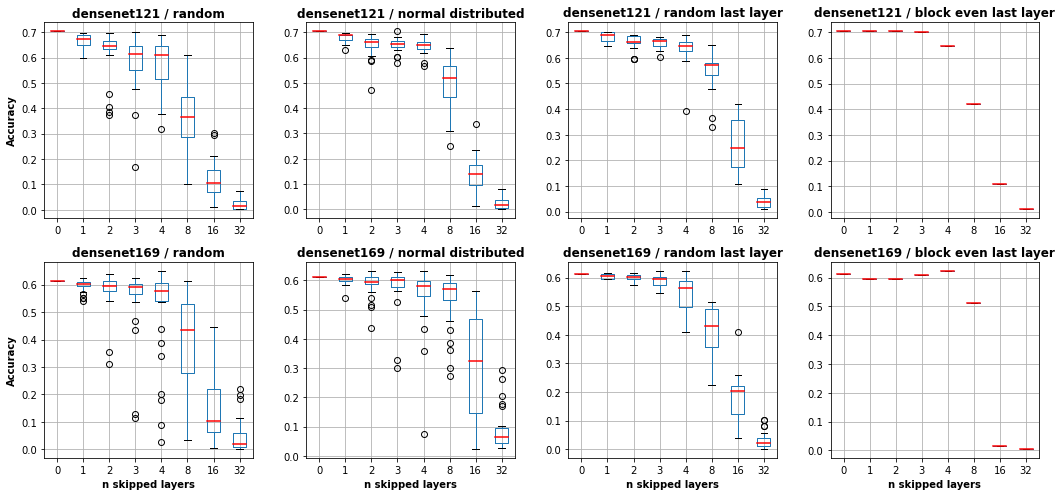

In [3]:
pol_trans = {
    'skip': 'random',
    'skip-last': 'random last layer',
    'skip-norm-n': 'normal distributed',
    'skip-last-n-block': 'block even last layer',
    'drop-rand-n': 'random',
    'drop-last-rand-n': 'last layer',
    'drop-norm-n': 'normal distributed'
}

def getDataFrameFromReports(csv_files):
    li = []
    for entry in csv_files:
        df = pd.read_csv(entry)
        if len(df) == 0:
            print("No data found in", entry)
        li.append(df)
    return pd.concat(li, axis=0, ignore_index=True)


s_df = getDataFrameFromReports(speed_reports)
q_df = getDataFrameFromReports(quality_reports)

base_q_df = q_df.query('pol == "none"')
print(base_q_df)

print(base_q_df[['arch', 'pol', 'prec', 'rec', 'acc', 'f1']])

print(s_df.columns)
print(q_df['arch'])

def printBoxPlotForArchAndPol(data_frame, arch_name, policy_name, ax, i=None, j=None, last_idx=None):
    df, an, pn = data_frame, arch_name, policy_name

    df = df.query(f'arch == "{an}"')
    df = df.query(f'pol == "{pn}"')
    df = df.append(data_frame.query(f'arch == "{an}"').query(f'pol == "none"'))
    if len(df) == 0:
        print("No content found")
        return
    #print(df)
    bp = df.boxplot(
        column=['acc'], 
        by='skip_n', 
        figsize=(8, 6), 
        ax=ax,
        medianprops=dict(linestyle='-', linewidth=1.5, color='r')
        )
    fig = np.asarray(bp).reshape(-1)[0].get_figure()
    fig.suptitle('')
    if j is not None and j == 0:
    #if policy_name == 'skip' or policy_name == 'drop-rand-n':
        ax.set_ylabel('Accuracy', fontsize=10, fontweight='bold')
    else:
        ax.set_ylabel('')

    if last_idx is not None and i is not None and i == last_idx:
        ax.set_xlabel('n skipped layers', fontsize=10, fontweight='bold')
    else:
        ax.set_xlabel('')
    ax.set_title(f'{an} / {pol_trans[pn]}', fontsize=12, fontweight='bold')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))

from optparse import OptionParser
import inspect

#member_list = inspect.getmembers(axes[0, 0])
#for mem in member_list:
#    print(mem)

d_archs = ['densenet121', 'densenet169']
dense_pols = ['skip', 'skip-norm-n', 'skip-last', 'skip-last-n-block']

for i, arch in enumerate(d_archs):
    for j, pol in enumerate(dense_pols):
        printBoxPlotForArchAndPol(q_df, arch, pol, axes[i, j], i, j, last_idx=len(d_archs) - 1)
fig.tight_layout()
plt.show()




In [4]:
q_df[q_df['pol'] == 'none']

,run,skip_n,bench_type,arch,pol,prec,rec,acc,f1,time
0,0,0,quality,densenet121,none,0.682875,0.682879,0.703656,0.682744,0.0
841,0,0,quality,densenet169,none,0.600423,0.600720,0.612246,0.592302,0.0
2312,0,0,quality,resnet101,none,0.065539,0.067045,0.110526,0.058128,0.0
2943,0,0,quality,resnet152,none,0.585624,0.585492,0.604947,0.574805,0.0
3394,0,0,quality,resnet18,none,0.684989,0.684924,0.685383,0.671122,0.0
3935,0,0,quality,resnet34,none,0.701903,0.703409,0.705718,0.688687,0.0
4476,0,0,quality,resnet50,none,0.621564,0.621515,0.609135,0.600557,0.0


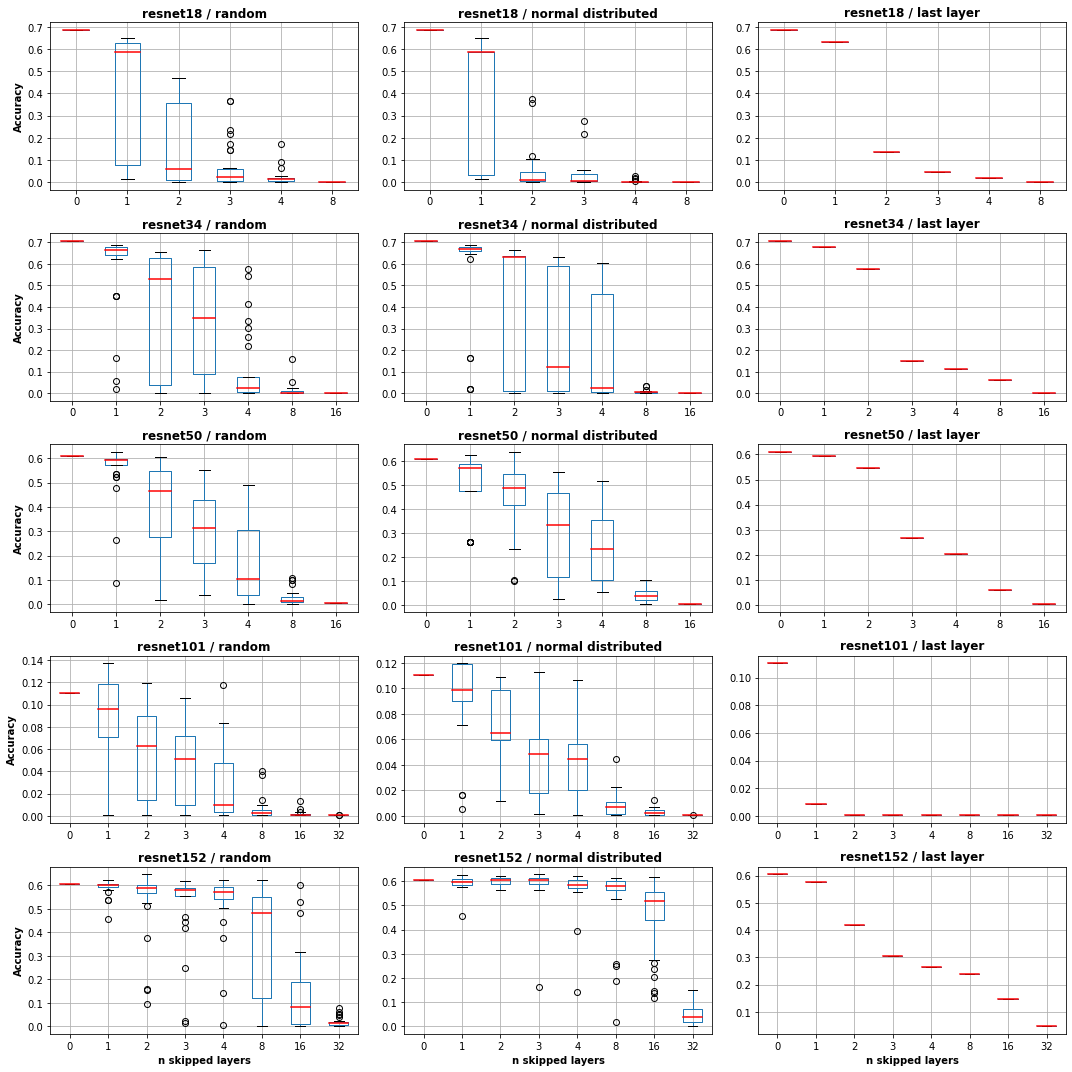

In [5]:
r_archs = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
r_pols = ['drop-rand-n', 'drop-norm-n', 'drop-last-rand-n']





fig, axes = plt.subplots(nrows=len(r_archs), ncols=3, figsize=(15, 3 * len(r_archs)))

for i, arch in enumerate(r_archs):
    for j, pol in enumerate(r_pols):
        printBoxPlotForArchAndPol(q_df, arch, pol, axes[i, j], i, j, last_idx=len(r_archs) - 1)

fig.tight_layout()
plt.show()

In [6]:
temp_df = s_df.query('arch == "resnet50" and pol == "drop-rand-n"')

temp_df

temp_df = temp_df.groupby(['skip_n', 'arch', 'pol']).agg({'time': 'mean'})

temp_df

,,,time
skip_n,arch,pol,
1,resnet50,drop-rand-n,0.799793
2,resnet50,drop-rand-n,0.742037
3,resnet50,drop-rand-n,0.687575
4,resnet50,drop-rand-n,0.655965
8,resnet50,drop-rand-n,0.412202
16,resnet50,drop-rand-n,0.076524


In [8]:
from scipy import stats
#print(s_df)
#s_df[['run', 'skip_n', 'arch', 'time']]

grouped_df = s_df.groupby(['skip_n', 'arch', 'pol']).agg({'time': [np.average]}).reset_index()
grouped_df

def getDataFrameWithoutOutliers(df):
    total_df = pd.DataFrame()
    
    for n in df['skip_n'].unique():
        for arch in df['arch'].unique():
            for pol in df['pol'].unique():
                if pol is not 'none':
                    temp_df = df[df['skip_n'] == n]
                    temp_df = temp_df[temp_df['arch'] == arch]
                    temp_df = temp_df[temp_df['pol'] == pol]
                
                    temp_df = temp_df[np.abs(temp_df.time-temp_df.time.mean()) <= (3 * temp_df.time.std())]
                    total_df = total_df.append(temp_df)
    return total_df

test2_df = getDataFrameWithoutOutliers(s_df).reset_index()
print(len(test2_df))
print(len(s_df))
grouped2_df = test2_df.groupby(['skip_n', 'arch', 'pol']).agg({'time': [np.average]}).reset_index()
grouped2_df = grouped2_df.append(grouped_df[grouped_df['pol'] == 'none']).reset_index()

print(len(grouped_df))

print(len(grouped2_df))

#grouped_df = grouped2_df
grouped_df = s_df.groupby(['skip_n', 'arch', 'pol']).agg({'time': 'mean'}).reset_index()
#grouped_df[grouped_df['arch'] == 'resnet50']

grouped_df = grouped_df.drop(grouped_df[(grouped_df.pol == 'none') & (grouped_df.skip_n > 1)].index)
#grouped_df[grouped_df['pol'] == 'none'].skip_n = 0
grouped_df.loc[(grouped_df.pol == 'none'), 'skip_n'] = 0


grouped_df[grouped_df['pol'] == 'none']

5088
5133
174
196


,skip_n,arch,pol,time
0,0,densenet121,none,0.085398
1,0,densenet169,none,0.137058
2,0,resnet101,none,2.187679
3,0,resnet152,none,2.381245
21,0,resnet18,none,0.185659
25,0,resnet34,none,0.326067
29,0,resnet50,none,0.833904


['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
0, drop-rand-n, ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
6
7
7
8
8
1, drop-norm-n, ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
6
7
7
8
8
2, drop-last-rand-n, ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
6
7
7
8
8


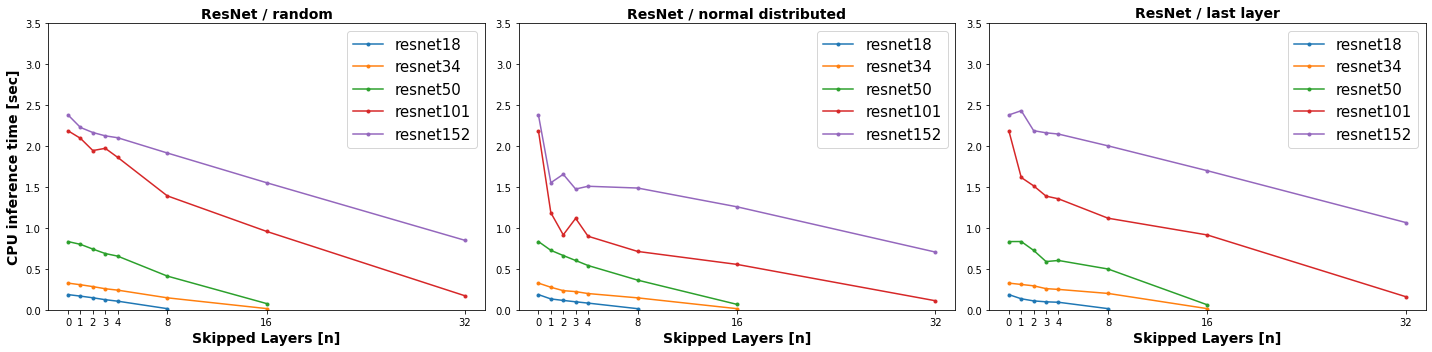

In [12]:

tr_archs = r_archs

font = dict()
font['fontsize'] = 14
font['fontweight'] = 'bold'
def linePlotArchs(df, policy, archs, ax, max_y=None):
    if max_y is not None:
        ax.set_ylim([0.0, max_y])

    pol_df = df[df['pol'] == policy]

    arch_type = 'ResNet' if 'res' in archs[0] else 'DenseNet'

    ax.set_title(f'{arch_type} / {pol_trans[policy]}', font)
    for arch in archs:
        plot_df = pol_df[pol_df['arch'] == f'{arch}']
        plot_df = df[df['arch'] == arch][df['pol'] == "none"].append(plot_df)
        print(len(plot_df))
        ax.plot(plot_df.skip_n, plot_df.time,'.-', label=arch, axes=ax)
    ax.legend(fontsize=15)
    ax.set_xticks(plot_df['skip_n'])
    ax.set_xlabel('Skipped Layers [n]', font)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes[0].set_ylabel('CPU inference time [sec]', font)

print(tr_archs)
for i, pol in enumerate(r_pols):
    print(f'{i}, {pol}, {r_archs}')
    linePlotArchs(grouped_df, pol, tr_archs, axes[i], 3.5)

fig.tight_layout()
plt.show()

In [22]:
grouped_df[grouped_df['pol'] == 'none']

,skip_n,arch,pol,time
0,0.0,densenet121,none,0.085398
1,0.0,densenet169,none,0.137058
2,0.0,resnet101,none,2.187679
3,0.0,resnet152,none,2.381245
19,0.0,resnet18,none,0.185659
23,0.0,resnet34,none,0.326067
27,0.0,resnet50,none,0.833904


8
8
8
8
8
8
8
8


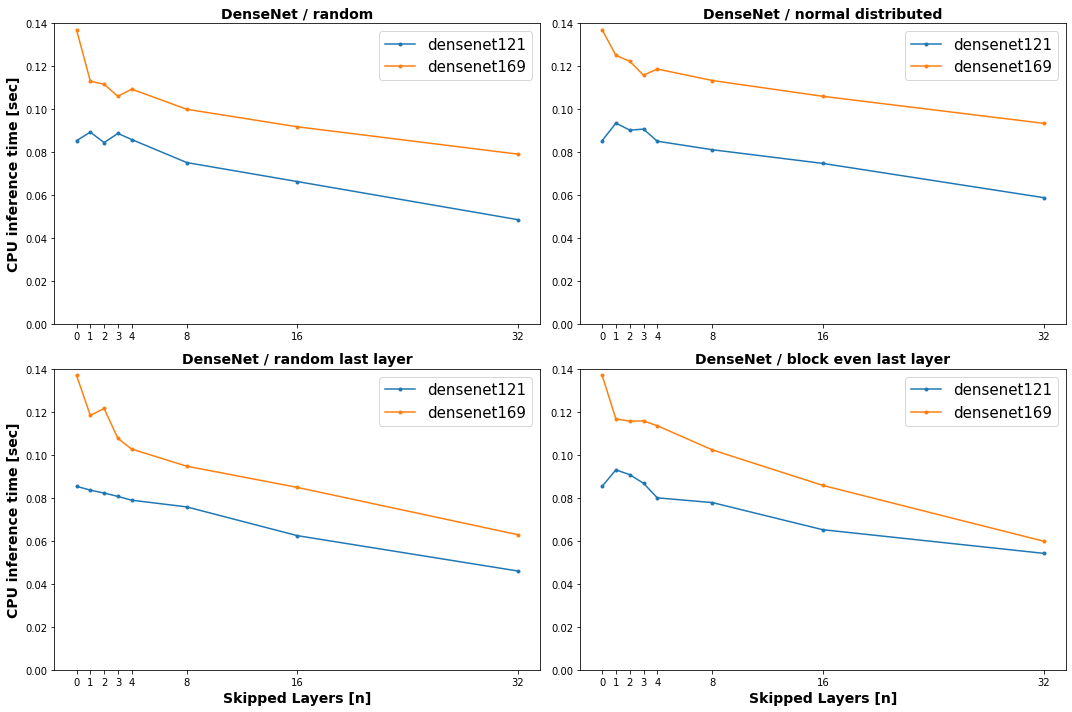

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes[0, 0].set_ylabel('CPU inference time [sec]', font)
axes[1, 0].set_ylabel('CPU inference time [sec]', font)
axes_ls = [axes[0, 0], axes[0, 1], axes[1,0], axes[1,1]]

for i, pol in enumerate(dense_pols):
    linePlotArchs(grouped_df, pol, d_archs, axes_ls[i], 0.14)

axes_ls[0].set_xlabel('')
axes_ls[1].set_xlabel('')

fig.tight_layout()
plt.show()

In [76]:
def executeQualityBench(arch_name, loader):
    prec = random.random()
    acc = random.random()
    rec = random.random()

    return prec, acc, rec

def executeSpeedBench(arch_name, loader):
    speed = random.random()
    return speed



d = {'run': [], 'skip_n': [], 'bench_type': [], 'arch': [], 'pol': [], 'prec': [], 'rec': [], 'acc': [], 'time': []}


loader = []

for bench_type in bench_types:
    for arch, pol in arch_pol_tupl_ls:
        for skip_n in skip_layers_values:
            for run in range(runs):
                prec = 0.0
                rec = 0.0
                acc = 0.0
                time = 0.0
                if bench_type == 'quality':
                    prec, acc, rec = executeQualityBench(f'{arch}-{pol}', loader)
                    #print(f'{run} - {skip_n} - {bench_type} - {arch} - {pol} - {prec:.6f} - {rec:.6f} - {acc:.6f}')
                elif bench_type == 'speed':
                    time = executeSpeedBench(f'{arch}-{pol}', loader)
                    #print(f'{run} - {skip_n} - {bench_type} - {arch} - {pol} - {time:.6f}')
                else:
                    raise ValueError('Benchmark type not supported')
                
                d['run'].append(run)
                d['skip_n'].append(skip_n)
                d['bench_type'].append(bench_type)
                d['arch'].append(arch)
                d['pol'].append(pol)
                d['prec'].append(prec)
                d['rec'].append(rec)
                d['acc'].append(acc)
                d['time'].append(time)

In [81]:
df = pd.DataFrame(data=d)
reports_path = os.path.join(os.getcwd())
print(reports_path)
if not os.path.isdir:
    os.mkdir(reports_path)
df.to_csv(os.path.join(reports_path, 'run.csv'), index=False)
columns = list(d.keys())
print(columns)

/home/alex/Projects/Studium/anytimeDnn/reports
['run', 'skip_n', 'bench_type', 'arch', 'pol', 'prec', 'rec', 'acc', 'time']


Plot for pol1
Plot for pol2


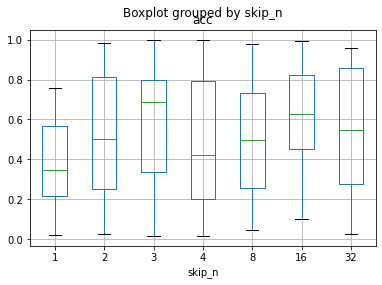

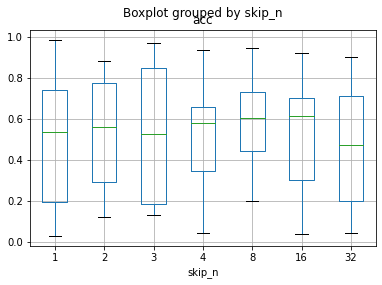

In [4]:
msd_archs = ['msdnet4', 'msdnet5', 'msdnet10']
msd_pol = ['none']

reports_list = os.listdir()

reports_list = list(filter(lambda x: 'msdnet' in x, sorted(reports_list)))

reports_list

q_df = list(filter(lambda x: 'quality' in x, reports_list))
s_df = list(filter(lambda x: 'speed' in x, reports_list))

printList(q_df)
printList(s_df)

q_df = getDataFrameFromReports(q_df)
s_df = getDataFrameFromReports(s_df)

print(len(q_df))
print(q_df)
print(len(s_df))
print(s_df)


quality-msdnet10-run.csv
quality-msdnet4-run.csv
quality-msdnet5-run.csv

speed-msdnet10-none-run.csv
speed-msdnet4-none-run.csv
speed-msdnet5-none-run.csv
19
    classifier      arch       acc      prec       rec        f1
0            1  msdnet10  0.281184  0.279735  0.246340  0.242446
1            2  msdnet10  0.238901  0.237652  0.199772  0.204094
2            3  msdnet10  0.217759  0.218220  0.168801  0.174920
3            4  msdnet10  0.257928  0.257424  0.250577  0.228686
4            5  msdnet10  0.300211  0.298864  0.282258  0.267106
5            6  msdnet10  0.270613  0.269318  0.233198  0.231010
6            7  msdnet10  0.300211  0.298485  0.283439  0.263767
7            8  msdnet10  0.219873  0.219735  0.163249  0.172973
8            9  msdnet10  0.287526  0.285985  0.261945  0.246288
9           10  msdnet10  0.295983  0.294735  0.265792  0.259048
10           1   msdnet4  0.553911  0.553295  0.590119  0.540677
11           2   msdnet4  0.583510  0.582652  0.600541  0.57

In [9]:
grouped_sdf = s_df.groupby(['classifier', 'arch'], as_index=False).agg({'time': 'mean'})


print(grouped_sdf[grouped_sdf['arch'] == 'msdnet4'])
print(grouped_sdf[grouped_sdf['arch'] == 'msdnet5'])
print(grouped_sdf[grouped_sdf['arch'] == 'msdnet10'])

    classifier     arch        time
2            1  msdnet5   31.248975
5            2  msdnet5   57.899610
8            3  msdnet5   78.043686
11           4  msdnet5   94.528414
13           5  msdnet5  101.213596


'\n\ndef linePlotArchs(df, policy, archs, ax, max_y=None):\n    if max_y is not None:\n        ax.set_ylim([0.0, max_y])\n\n    pol_df = df[df[\'pol\'] == policy]\n\n    arch_type = \'ResNet\' if \'res\' in archs[0] else \'DenseNet\'\n\n    ax.set_title(f\'{arch_type} / {pol_trans[policy]}\', font)\n    for arch in archs:\n        plot_df = pol_df[pol_df[\'arch\'] == f\'{arch}\']\n        plot_df = df[df[\'arch\'] == arch][df[\'pol\'] == "none"].append(plot_df)\n        print(len(plot_df))\n        ax.plot(plot_df.skip_n, plot_df.time,\'.-\', label=arch, axes=ax)\n    ax.legend(fontsize=15)\n    ax.set_xticks(plot_df[\'skip_n\'])\n    ax.set_xlabel(\'Skipped Layers [n]\', font)\n\nfig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))\naxes[0].set_ylabel(\'CPU inference time [sec]\', font)\n'

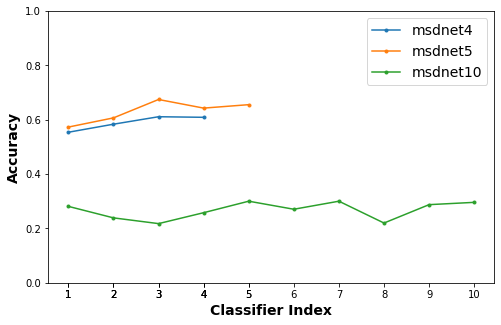

In [13]:

font = dict()
font['fontsize'] = 14
font['fontweight'] = 'bold'
grouped_qdf = q_df.groupby(['classifier', 'arch'], as_index=False).agg({'acc': 'mean', 'prec': 'mean', 'rec': 'mean', 'f1': 'mean'})
grouped_qdf = grouped_qdf[['classifier', 'arch', 'acc']]

fix, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.set_ylabel('Accuracy', font)
axes.set_ylim([0.0, 1.0])
axes.set_xticks(grouped_qdf['classifier'])
axes.set_xlabel('Classifier Index', font)

def plotMSDNet(axes, df, name: str):
    plot_df = df[df['arch'] == name]
    axes.plot(plot_df.classifier, plot_df.acc, '.-', label=name)


for arch in msd_archs:
    plotMSDNet(axes, grouped_qdf, arch)

axes.legend(fontsize=font['fontsize'])

"""

def linePlotArchs(df, policy, archs, ax, max_y=None):
    if max_y is not None:
        ax.set_ylim([0.0, max_y])

    pol_df = df[df['pol'] == policy]

    arch_type = 'ResNet' if 'res' in archs[0] else 'DenseNet'

    ax.set_title(f'{arch_type} / {pol_trans[policy]}', font)
    for arch in archs:
        plot_df = pol_df[pol_df['arch'] == f'{arch}']
        plot_df = df[df['arch'] == arch][df['pol'] == "none"].append(plot_df)
        print(len(plot_df))
        ax.plot(plot_df.skip_n, plot_df.time,'.-', label=arch, axes=ax)
    ax.legend(fontsize=15)
    ax.set_xticks(plot_df['skip_n'])
    ax.set_xlabel('Skipped Layers [n]', font)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axes[0].set_ylabel('CPU inference time [sec]', font)
"""